The Cholesky Decomposition exists when a matrix is hermitian and positive-definite. It expresses the matrix $\mathbf{A}$ as:

\begin{equation}
\mathbf{A} = \mathbf{L}\mathbf{L^\dagger}
\end{equation}

Where $\mathbf{L}$ is a lower-triangular matrix with positive, real diagonal entries. When $\mathbf{A}$ is real, then so is $\mathbf{L}$. The Cholesky decomposition enables fast solution of a linear system, but it can also be used to create correlated random variables in Monte Carlo simulations. 

### Creating Correlated Random Variables
Let $\mathbf{u}_t$ be a vector of uncorrelated samples with unit standard deviation. If the covariance matrix of the system to be simulated is  $\mathbf{\Sigma}$ with Cholesky decomposition $\mathbf{\Sigma} = \mathbf{LL}^\dagger$, then the vector $\mathbf{v}_t = \mathbf{Lu}_t$ has the desired covariance.



In [249]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed = 42

T = 10000
n = 5

M = np.random.randn(*(n,n))
Covar = np.matmul(M.T,M) # random symmetric matrix

L = np.linalg.cholesky(Covar)

print('covar:\n',Covar)
print('L:\n',L)
print('L*L^T:\n',np.matmul(L,L.T))
print('covar - L*L^T = 0',np.allclose(np.matmul(L,L.T)-Covar,0))

covar:
 [[ 3.54069077  1.45540645  0.7021179   0.24799534 -1.03087794]
 [ 1.45540645  6.08972725 -3.02915372 -6.14008103  1.8217575 ]
 [ 0.7021179  -3.02915372  3.31477833  5.41477787 -1.7901799 ]
 [ 0.24799534 -6.14008103  5.41477787 10.74362805 -4.65168294]
 [-1.03087794  1.8217575  -1.7901799  -4.65168294  4.67618904]]
L:
 [[ 1.88167233  0.          0.          0.          0.        ]
 [ 0.77346434  2.34339074  0.          0.          0.        ]
 [ 0.37313505 -1.41579478  1.08216159  0.          0.        ]
 [ 0.13179518 -2.66367012  1.47333839  1.20846743  0.        ]
 [-0.54785199  0.95822751 -0.21170924 -1.41928305  1.18265045]]
L*L^T:
 [[ 3.54069077  1.45540645  0.7021179   0.24799534 -1.03087794]
 [ 1.45540645  6.08972725 -3.02915372 -6.14008103  1.8217575 ]
 [ 0.7021179  -3.02915372  3.31477833  5.41477787 -1.7901799 ]
 [ 0.24799534 -6.14008103  5.41477787 10.74362805 -4.65168294]
 [-1.03087794  1.8217575  -1.7901799  -4.65168294  4.67618904]]
covar - L*L^T = 0 True


In [262]:
u = np.random.randn(*(n,T))
v = np.matmul(L,u)

Text(0.5, 1.0, 'correlated')

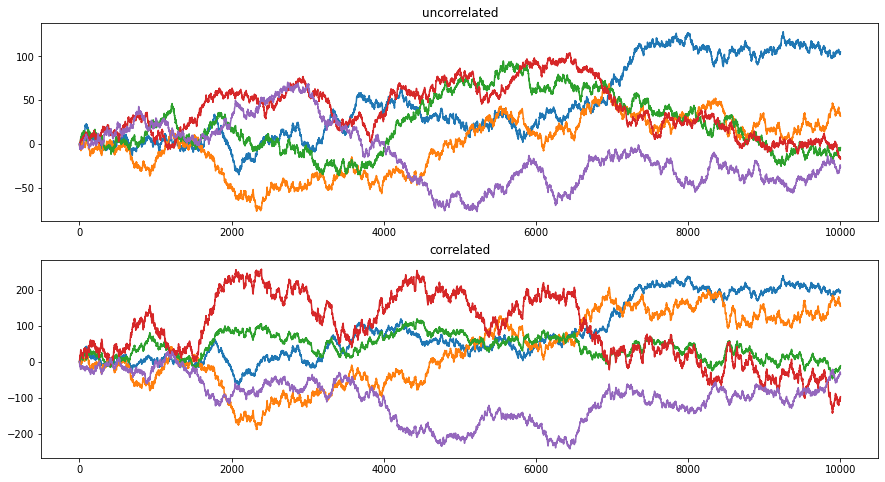

In [263]:
fig, ax = plt.subplots(2,1,figsize=(15,8)) 
for i in range(n):
    ax[0].plot(np.cumsum(u[i],axis=0))
    ax[1].plot(np.cumsum(v[i],axis=0))
    
ax[0].set_title('uncorrelated')
ax[1].set_title('correlated')

Text(0.5, 1.0, 'Error')

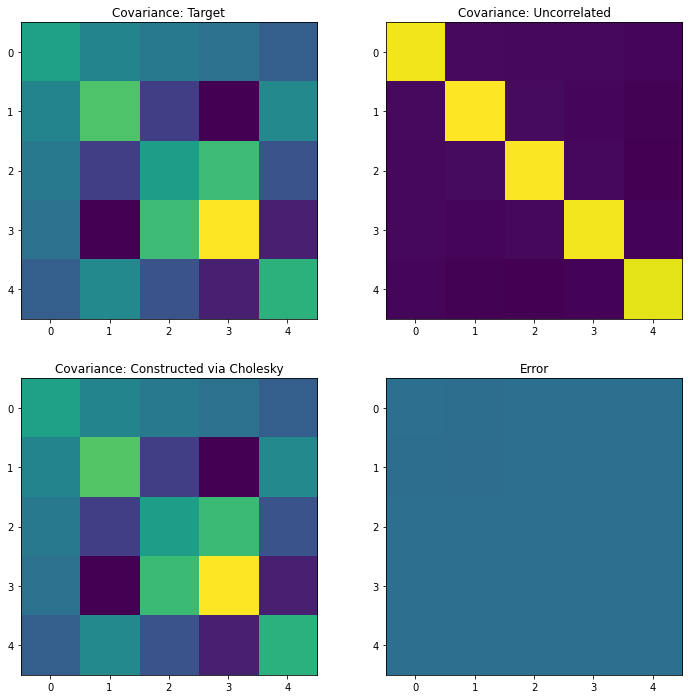

In [264]:
fig, ax = plt.subplots(2,2,figsize=(12,12))


ax[0][0].imshow(Covar,vmin=np.min(Covar),vmax=np.max(Covar))
ax[0][0].set_title('Covariance: Target')
ax[0][1].imshow(np.cov(u))
ax[0][1].set_title('Covariance: Uncorrelated')
ax[1][0].imshow(np.cov(v),vmin=np.min(Covar),vmax=np.max(Covar))
ax[1][0].set_title('Covariance: Constructed via Cholesky')
ax[1][1].imshow(Covar-np.cov(v),vmin=np.min(Covar),vmax=np.max(Covar))
ax[1][1].set_title('Error')